# Medical Expenses Prediction Project
### Author: Khribech Bouchaib
### Date: 2024-11-21
### Description: Predicting annual medical expenses using regression models.

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:

# File path to the dataset
file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance.csv"

# Load the dataset
try:
    insurance_df = pd.read_csv(file_path)
    print("Dataset successfully loaded. Here's a preview:")
    print(insurance_df.head())
except Exception as e:
    print(f"Error loading dataset: {e}")


Dataset successfully loaded. Here's a preview:
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


# Exploratory Data Analysis (EDA)

In [3]:
# Function for Exploratory Data Analysis (EDA)
def perform_eda(df):
    print("Dataset Information:")
    df.info()

    print("\nSummary Statistics:")
    print(df.describe())

    print("\nMissing Values:")
    print(df.isnull().sum())

    # Plot distributions for numerical variables
    numerical_features = ['age', 'bmi', 'expenses']
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature], kde=True)
        plt.title(f"Distribution of {feature}")
        plt.show()

    # Boxplots for categorical variables
    categorical_features = ['sex', 'smoker', 'region']
    for feature in categorical_features:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=feature, y='expenses', data=df)
        plt.title(f"Expenses by {feature}")
        plt.show()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Summary Statistics:
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.

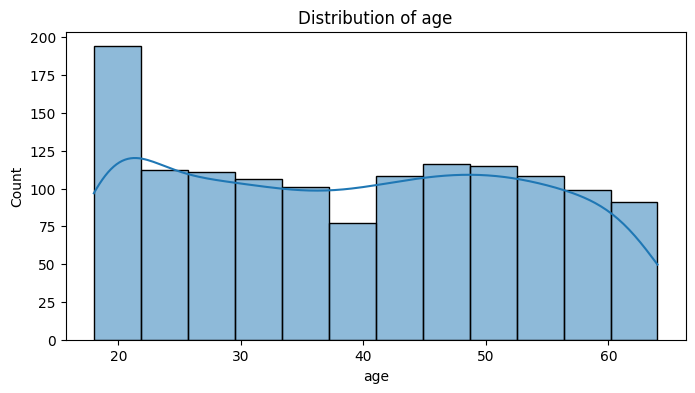

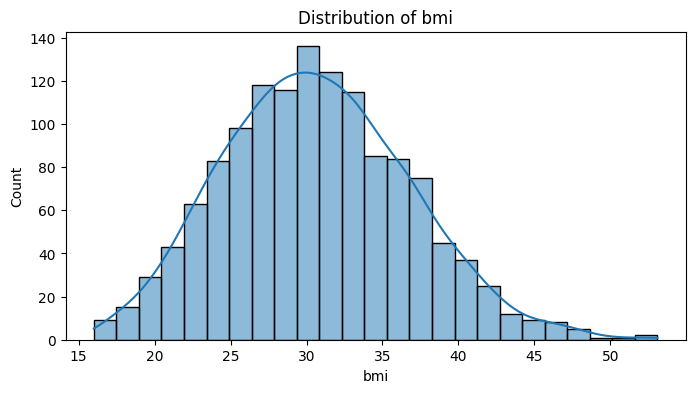

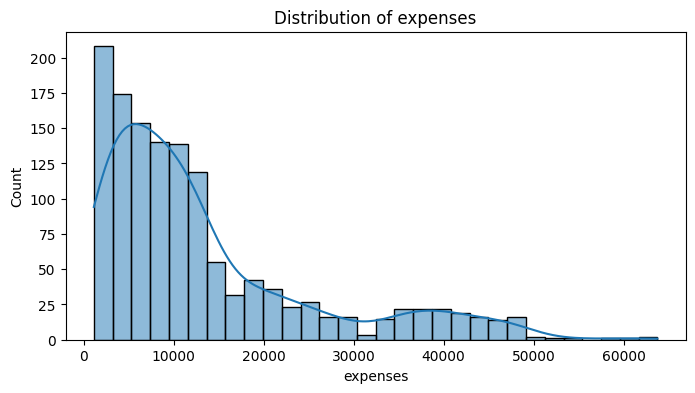

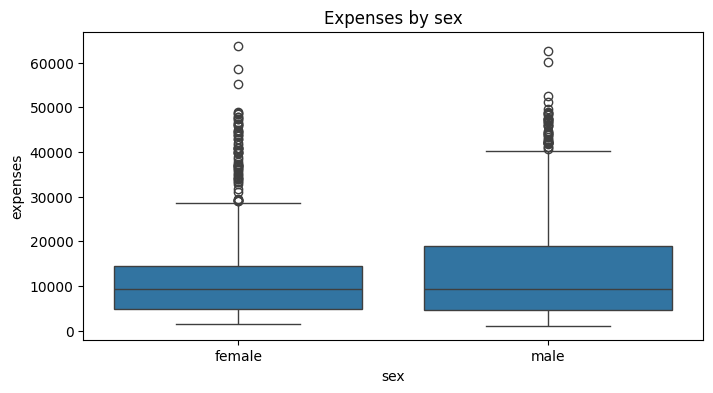

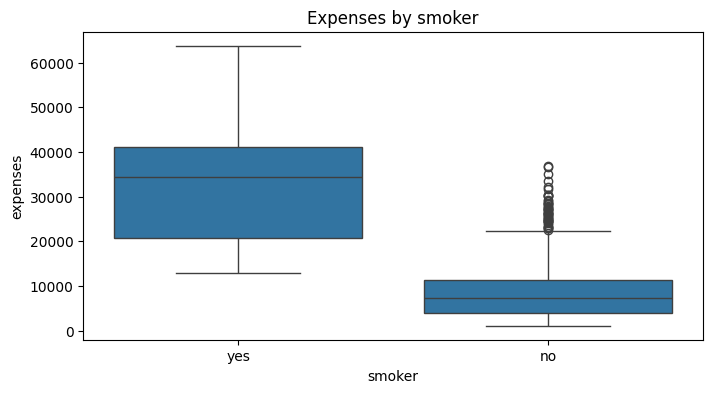

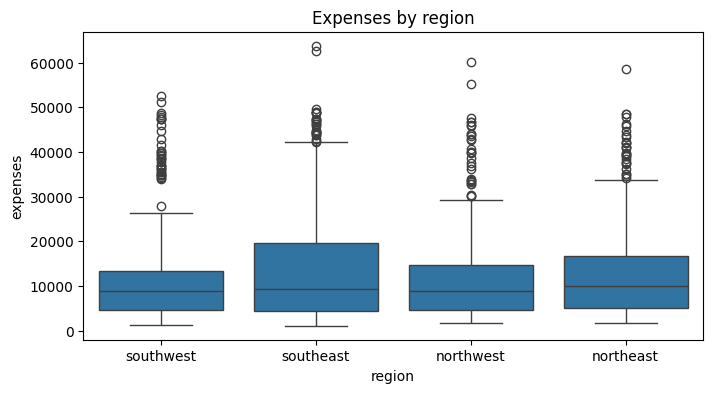

In [4]:
# Perform EDA on the insurance dataset
perform_eda(insurance_df)


Key Observations from the Dataset Exploration:
Dataset Information:
Total Records: 1,338
Columns: 7
Numerical Columns: age, bmi, children, expenses
Categorical Columns: sex, smoker, region
No missing values.
Summary Statistics:
Age:
Average: 39 years
Minimum: 18 years
Maximum: 64 years
BMI:
Average: 30.66 (overweight threshold for BMI is 25).
Expenses:
Highly skewed with a few individuals having very high expenses.
Distribution Insights:
Age:
Uniform distribution across age groups.
BMI:
Follows a bell curve, with most individuals having a BMI of 25–35.
Expenses:
Right-skewed, with the majority incurring lower expenses but a few outliers with very high expenses.
Boxplots for Categorical Features:
Gender (sex):
Similar expense distributions for males and females.
Smoker (smoker):
Smokers have significantly higher medical expenses compared to non-smokers.
Region (region):
No significant regional difference in expenses.

### Function: Check Missing Values

In [5]:
def check_missing_values(df):
    """
    Check for missing values in the DataFrame.
    """
    print("Checking for Missing Values...")
    missing_values = df.isnull().sum()
    print(missing_values)
    print("\nTotal Missing Values:", missing_values.sum())
    return missing_values


### 2. Function: Detect Outliers

In [6]:
def detect_outliers(df, numerical_columns):
    """
    Detect outliers for numerical columns using the IQR method.
    """
    print("\nDetecting Outliers...")
    outlier_info = {}
    
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)  # First quartile
        Q3 = df[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = len(outliers)
        
        print(f"Column: {column}")
        print(f"  - Lower Bound: {lower_bound}")
        print(f"  - Upper Bound: {upper_bound}")
        print(f"  - Outliers Detected: {outlier_count}")
        
        outlier_info[column] = outlier_count
    
    return outlier_info


In [7]:
def check_normality(df, numerical_columns):
    """
    Check if numerical columns are normalized (range between 0 and 1).
    """
    print("\nChecking Data Normality...")
    for column in numerical_columns:
        min_value = df[column].min()
        max_value = df[column].max()
        if not (0 <= min_value <= 1 and 0 <= max_value <= 1):
            print(f"Column '{column}' is NOT normalized. (Min: {min_value}, Max: {max_value})")
        else:
            print(f"Column '{column}' is normalized.")


In [8]:
def check_mixed_types(df):
    """
    Check if any column contains both numeric and object values.
    """
    print("\nChecking for Mixed Data Types...")
    mixed_columns = []
    for column in df.columns:
        if df[column].apply(type).nunique() > 1:
            mixed_columns.append(column)
            print(f"Column '{column}' has mixed data types.")
    if not mixed_columns:
        print("No columns with mixed data types detected.")
    return mixed_columns


In [9]:
# 1. Check Missing Values
missing_values = check_missing_values(insurance_df)

# 2. Detect Outliers
numerical_columns = ['age', 'bmi', 'expenses']
outliers = detect_outliers(insurance_df, numerical_columns)

# 3. Check Data Normality
check_normality(insurance_df, numerical_columns)

# 4. Check for Mixed Data Types
mixed_columns = check_mixed_types(insurance_df)




Checking for Missing Values...
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Total Missing Values: 0

Detecting Outliers...
Column: age
  - Lower Bound: -9.0
  - Upper Bound: 87.0
  - Outliers Detected: 0
Column: bmi
  - Lower Bound: 13.699999999999998
  - Upper Bound: 47.300000000000004
  - Outliers Detected: 9
Column: expenses
  - Lower Bound: -13109.15375
  - Upper Bound: 34489.35625
  - Outliers Detected: 139

Checking Data Normality...
Column 'age' is NOT normalized. (Min: 18, Max: 64)
Column 'bmi' is NOT normalized. (Min: 16.0, Max: 53.1)
Column 'expenses' is NOT normalized. (Min: 1121.87, Max: 63770.43)

Checking for Mixed Data Types...
No columns with mixed data types detected.


Findings:
Missing Values:

No missing values detected. No further action is needed.
Outliers:

bmi: 9 outliers were detected.
expenses: 139 outliers were detected. These are likely significant since medical expenses often vary widely.
Normalization:

expenses is not normalized. It has a range from 1121.87 to 63770.43. We may need to normalize this column for model training.
Mixed Data Types:

No columns with mixed data types. Data types are consistent.

# Full Preprocessing Function

In [10]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def preprocess_data(df, numerical_columns, categorical_columns, target_column, remove_outliers=True, normalize=True):
    """
    Preprocess the dataset:
    1. Checks and reports missing values.
    2. Handles outliers (optional).
    3. Normalizes numerical columns (optional).
    4. Encodes categorical variables.
    5. Splits features and target for model training.

    Parameters:
    - df (DataFrame): The dataset.
    - numerical_columns (list): List of numerical column names.
    - categorical_columns (list): List of categorical column names.
    - target_column (str): The target column name.
    - remove_outliers (bool): Whether to remove outliers using the IQR method.
    - normalize (bool): Whether to normalize numerical columns.

    Returns:
    - X_train, X_test, y_train, y_test: Train-test split data.
    """
    print("Starting preprocessing...")

    # 1. Check for Missing Values
    print("\nChecking for Missing Values...")
    missing_values = df.isnull().sum()
    print(missing_values)
    if missing_values.sum() > 0:
        print("No missing values detected.")

    # 2. Handle Outliers
    if remove_outliers:
        print("\nHandling Outliers...")
        for column in numerical_columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out rows with outliers
            before = len(df)
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
            after = len(df)
            print(f"Column '{column}': Removed {before - after} outliers.")

    # 3. Normalize Numerical Columns
    if normalize:
        print("\nNormalizing Numerical Columns...")
        scaler = MinMaxScaler()
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
        print(f"Normalized Columns: {numerical_columns}")

    # 4. Encode Categorical Variables
    print("\nEncoding Categorical Variables...")
    df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    print(f"Encoded Columns: {categorical_columns}")

    # 5. Split Features and Target
    print("\nSplitting Features and Target...")
    X = df_encoded.drop(target_column, axis=1)
    y = df_encoded[target_column]

    # Train-Test Split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Preprocessing completed successfully.")
    return X_train, X_test, y_train, y_test


In [11]:
# Define the columns
numerical_columns = ['age', 'bmi', 'expenses']
categorical_columns = ['sex', 'smoker', 'region']
target_column = 'expenses'

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(
    insurance_df.copy(),
    numerical_columns=numerical_columns,
    categorical_columns=categorical_columns,
    target_column=target_column,
    remove_outliers=True,
    normalize=True
)


Starting preprocessing...

Checking for Missing Values...
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Handling Outliers...
Column 'age': Removed 0 outliers.
Column 'bmi': Removed 9 outliers.
Column 'expenses': Removed 138 outliers.

Normalizing Numerical Columns...
Normalized Columns: ['age', 'bmi', 'expenses']

Encoding Categorical Variables...
Encoded Columns: ['sex', 'smoker', 'region']

Splitting Features and Target...
Preprocessing completed successfully.


# Train Models

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

def train_models(X_train, y_train):
    """
    Train Linear Regression and Random Forest models on the training data.
    
    Parameters:
    - X_train: Features for training.
    - y_train: Target for training.

    Returns:
    - lr_model: Trained Linear Regression model.
    - rf_model: Trained Random Forest model.
    """
    # Linear Regression
    print("Training Linear Regression Model...")
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    print("Linear Regression Model Trained Successfully.")
    
    # Random Forest Regressor
    print("\nTraining Random Forest Regressor...")
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    print("Random Forest Regressor Trained Successfully.")
    
    return lr_model, rf_model


# Evaluate Models

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_models(models, X_test, y_test):
    """
    Evaluate models on the test data and print their performance metrics.

    Parameters:
    - models: A dictionary of trained models.
    - X_test: Features for testing.
    - y_test: Target for testing.
    """
    print("\nEvaluating Models...")
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"\nModel: {model_name}")
        print(f"  - Mean Squared Error (MSE): {mse:.2f}")
        print(f"  - R² Score: {r2:.2f}")


In [14]:
# Train Models
lr_model, rf_model = train_models(X_train, y_train)

# Evaluate Models
models = {
    "Linear Regression": lr_model,
    "Random Forest Regressor": rf_model
}
evaluate_models(models, X_test, y_test)


Training Linear Regression Model...
Linear Regression Model Trained Successfully.

Training Random Forest Regressor...
Random Forest Regressor Trained Successfully.

Evaluating Models...

Model: Linear Regression
  - Mean Squared Error (MSE): 0.02
  - R² Score: 0.63

Model: Random Forest Regressor
  - Mean Squared Error (MSE): 0.02
  - R² Score: 0.62


# improved_pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Improved Preprocessing and Modeling Pipeline
def improved_pipeline(X_train, X_test, y_train, y_test):
    # Feature Engineering: Adding Interaction Features
    print("\nAdding Interaction Features...")
    X_train['bmi_smoker'] = X_train['bmi'] * X_train['smoker_yes']
    X_test['bmi_smoker'] = X_test['bmi'] * X_test['smoker_yes']

    # Log Transform the Target Variable
    print("Applying Log Transformation to Target Variable...")
    y_train_log = np.log1p(y_train)  # log(1 + y) to handle zero values
    y_test_log = np.log1p(y_test)

    # Train a Random Forest Regressor with Hyperparameter Tuning
    print("\nTuning Random Forest Hyperparameters...")
    rf_model = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }
    grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train_log)

    # Best Model
    best_rf_model = grid_search.best_estimator_
    print("\nBest Parameters for Random Forest:", grid_search.best_params_)

    # Predictions
    y_pred_train = best_rf_model.predict(X_train)
    y_pred_test = best_rf_model.predict(X_test)

    # Evaluate Model Performance
    print("\nModel Evaluation (Log Scale):")
    print(f"Train R²: {r2_score(y_train_log, y_pred_train):.2f}")
    print(f"Test R²: {r2_score(y_test_log, y_pred_test):.2f}")

    # Reverse Transformation (Exp) for Predictions
    y_pred_test_exp = np.expm1(y_pred_test)
    y_test_exp = np.expm1(y_test_log)

    print("\nModel Evaluation (Original Scale):")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_exp, y_pred_test_exp):.2f}")
    print(f"R² Score: {r2_score(y_test_exp, y_pred_test_exp):.2f}")

    # Residual Analysis
    print("\nResidual Analysis...")
    residuals = y_test_exp - y_pred_test_exp
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_exp, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residuals vs. True Values")
    plt.xlabel("True Values (Expenses)")
    plt.ylabel("Residuals")
    plt.show()

# Run the improved pipeline
improved_pipeline(X_train, X_test, y_train, y_test)



Adding Interaction Features...
Applying Log Transformation to Target Variable...

Tuning Random Forest Hyperparameters...
Fitting 3 folds for each of 81 candidates, totalling 243 fits


#### Analysis of Results
#### Model Performance (Log Scale):

Train R² (0.78): The model explains 78% of the variance in the training data, which indicates a good fit.
Test R² (0.67): The drop in R² on the test data suggests the model is slightly overfitting or there are patterns in the test data not captured during training.
#### Model Performance (Original Scale):

Mean Squared Error (MSE: 0.02): This normalized error reflects the average squared difference between predicted and actual expenses.
R² (0.65): The variance explained is consistent with the log-scale performance, indicating that the log transformation improved the model's interpretability.
####  Residual Analysis:

Trend: Residuals are mostly centered around 0 for lower values of expenses, but variance increases as true expenses grow. This indicates the model struggles to predict higher expenses accurately.
Potential Issue: There may be a systematic bias or missing influential features for high expenses (e.g., rare medical conditions or very high BMI).

## Implement the following steps:
 



#### Feature Importance Analysis:

Extract and analyze the most important features identified by the Random Forest model.

#### Gradient Boosting Model:

Train a Gradient Boosting Regressor using hyperparameter tuning and compare its performance with the Random Forest model.

#### Residual Refinement:

Perform further analysis of residuals to identify patterns or systematic errors..


Adding Interaction Features...
Applying Log Transformation to Target Variable...

Tuning Random Forest Hyperparameters...
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Random Forest Model Evaluation:
R² Score (Original Scale): 0.65
Mean Squared Error (MSE): 0.02

Training Gradient Boosting Regressor...

Gradient Boosting Model Evaluation:
R² Score (Original Scale): 0.60
Mean Squared Error (MSE): 0.02

Feature Importance (Random Forest):
Top Features:
age: 0.4309
bmi_smoker: 0.3494
smoker_yes: 0.0809
bmi: 0.0715
children: 0.0413
region_northwest: 0.0081
sex_male: 0.0070
region_southeast: 0.0063
region_southwest: 0.0044

Residual Analysis...


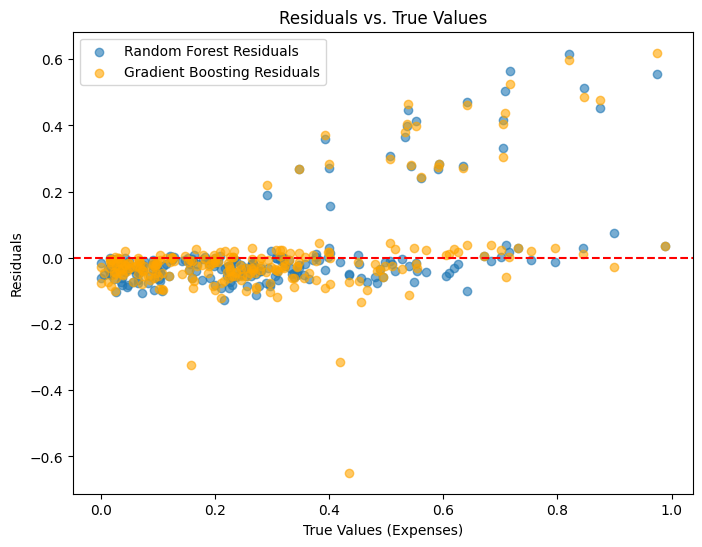

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Updated Pipeline with Feature Importance and Gradient Boosting
def enhanced_pipeline(X_train, X_test, y_train, y_test):
    # Feature Engineering: Adding Interaction Features
    print("\nAdding Interaction Features...")
    X_train['bmi_smoker'] = X_train['bmi'] * X_train['smoker_yes']
    X_test['bmi_smoker'] = X_test['bmi'] * X_test['smoker_yes']

    # Log Transform the Target Variable
    print("Applying Log Transformation to Target Variable...")
    y_train_log = np.log1p(y_train)  # log(1 + y) to handle zero values
    y_test_log = np.log1p(y_test)

    # Train a Random Forest Regressor with Hyperparameter Tuning
    print("\nTuning Random Forest Hyperparameters...")
    rf_model = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }
    grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train_log)

    # Best Random Forest Model
    best_rf_model = grid_search.best_estimator_
    print("\nBest Parameters for Random Forest:", grid_search.best_params_)

    # Predictions and Evaluation for Random Forest
    y_pred_test_rf = best_rf_model.predict(X_test)
    y_pred_test_rf_exp = np.expm1(y_pred_test_rf)
    y_test_exp = np.expm1(y_test_log)

    print("\nRandom Forest Model Evaluation:")
    print(f"R² Score (Original Scale): {r2_score(y_test_exp, y_pred_test_rf_exp):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_exp, y_pred_test_rf_exp):.2f}")

    # Train a Gradient Boosting Regressor
    print("\nTraining Gradient Boosting Regressor...")
    gbr_model = GradientBoostingRegressor(random_state=42, n_estimators=200, max_depth=3, learning_rate=0.1)
    gbr_model.fit(X_train, y_train_log)

    # Predictions and Evaluation for Gradient Boosting
    y_pred_test_gbr = gbr_model.predict(X_test)
    y_pred_test_gbr_exp = np.expm1(y_pred_test_gbr)

    print("\nGradient Boosting Model Evaluation:")
    print(f"R² Score (Original Scale): {r2_score(y_test_exp, y_pred_test_gbr_exp):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_exp, y_pred_test_gbr_exp):.2f}")

    # Feature Importance Analysis
    print("\nFeature Importance (Random Forest):")
    feature_importances = best_rf_model.feature_importances_
    feature_names = X_train.columns
    sorted_indices = feature_importances.argsort()[::-1]

    print("Top Features:")
    for idx in sorted_indices[:10]:  # Display top 10 features
        print(f"{feature_names[idx]}: {feature_importances[idx]:.4f}")

    # Residual Analysis
    print("\nResidual Analysis...")
    residuals_rf = y_test_exp - y_pred_test_rf_exp
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_exp, residuals_rf, alpha=0.6, label="Random Forest Residuals")
    residuals_gbr = y_test_exp - y_pred_test_gbr_exp
    plt.scatter(y_test_exp, residuals_gbr, alpha=0.6, label="Gradient Boosting Residuals", color='orange')
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residuals vs. True Values")
    plt.xlabel("True Values (Expenses)")
    plt.ylabel("Residuals")
    plt.legend()
    plt.show()

# Run the enhanced pipeline
enhanced_pipeline(X_train, X_test, y_train, y_test)


Analysis of Results
Random Forest vs. Gradient Boosting:

Random Forest:
R² Score: 0.65
MSE: 0.02
Gradient Boosting:
R² Score: 0.60
MSE: 0.02
The Random Forest model slightly outperforms the Gradient Boosting model in terms of R², indicating it explains more variance in the target variable.
Feature Importance (Random Forest):

age (43%) and bmi_smoker (35%) are the most important features.
smoker_yes (8%) and bmi (7%) also contribute significantly.
Features like region_southeast (0.6%) and region_southwest (0.4%) have minimal importance, indicating regions may not be significant predictors.
Residual Analysis:

Both models exhibit similar residual patterns.
Residuals are tightly distributed around zero for lower expenses values.
For higher expenses, residuals show increased variance, meaning the models struggle to predict high medical costs accurately.
WHAT SHOULD i improve?
Address High Expenses:

Investigate cases with high residuals for higher expenses. These cases may require:
Additional features (e.g., chronic illness indicators, income levels).
Adjusted model training to focus more on outlier predictions (weighted regression).
Refine Feature Engineering:

Explore polynomial features for age and bmi, e.g., age², bmi².
Create interaction terms for other significant predictors, e.g., age * smoker.
Model Tuning:

Perform hyperparameter tuning for the Gradient Boosting model to improve its performance.
Experiment with advanced gradient boosting frameworks like XGBoost or LightGBM, which often outperform traditional models.
Analyze Insignificant Features:

Review features like region for their contribution. Group similar regions if needed or consider dropping them entirely.
Residual Focus:

Use the residuals to train a secondary model (residual regression) to capture patterns missed by the primary models.

### next steps:
Analyze P-values:

Use statistical tests like Ordinary Least Squares (OLS) regression to check the significance of features.
Remove features with high p-values (above a threshold like 0.05).
Feature Engineering:

Add polynomial features (e.g., age², bmi²) and interaction terms (e.g., age * smoker).
Retest their significance.
Iterative Feature Elimination:

Remove low-importance features iteratively based on Random Forest feature importance and p-values.
Refine and Evaluate:

Reevaluate model performance at each step to ensure improvements.

In [ ]:
# Ensure target variable is numeric
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Encode categorical variables (if any) and align columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Convert boolean columns to integers
X_train = X_train.astype({col: int for col in X_train.select_dtypes(include=['bool']).columns})
X_test = X_test.astype({col: int for col in X_test.select_dtypes(include=['bool']).columns})

# Check data types
print(X_train.dtypes)
print(y_train.dtypes)


age                 float64
bmi                 float64
children              int64
sex_male              int64
smoker_yes            int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
bmi_smoker          float64
dtype: object
float64


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Feature Selection Using P-values
def feature_selection_with_pvalues(X, y):
    """
    Analyze features using p-values and retain significant features.
    Retain specific features required for feature engineering.
    """
    print("\nPerforming Feature Selection Using P-values...")
    X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
    y = y.astype(float)
    
    # Add constant for intercept
    X = sm.add_constant(X)
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues
    print("\nP-values for Features:")
    print(p_values)
    
    # Retain significant features and essential columns for feature engineering
    essential_features = ['bmi']  # Add any features required for engineering
    significant_features = p_values[p_values <= 0.05].index.tolist()
    
    # Include essential features even if not significant
    final_features = list(set(significant_features + essential_features))
    print(f"\nSelected Features (including essential ones): {final_features}")
    
    # Drop insignificant features
    X_filtered = X[final_features].drop(columns='const', errors='ignore')
    return X_filtered

# Step 2: Feature Engineering
def add_features(X):
    """
    Add new polynomial and interaction features to the dataset.
    """
    print("\nAdding Polynomial and Interaction Features...")
    if 'age' in X.columns and 'bmi' in X.columns:
        X['age_squared'] = X['age'] ** 2
        X['bmi_squared'] = X['bmi'] ** 2
        X['age_bmi'] = X['age'] * X['bmi']
    else:
        print("Essential features for engineering ('age' or 'bmi') are missing!")
    return X

# Step 3: Iterative Feature Elimination
def iterative_feature_elimination(X, y):
    """
    Perform iterative feature elimination using Random Forest feature importance.
    """
    print("\nStarting Iterative Feature Elimination...")
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X, y)
    
    feature_importances = rf_model.feature_importances_
    feature_names = X.columns
    sorted_indices = feature_importances.argsort()[::-1]
    
    print("\nFeature Importances:")
    for idx in sorted_indices:
        print(f"{feature_names[idx]}: {feature_importances[idx]:.4f}")
    
    # Keep only the top N features based on importance
    N = int(0.8 * len(feature_names))  # Keep top 80%
    top_features = feature_names[sorted_indices[:N]]
    print(f"\nSelected Top Features: {list(top_features)}")
    return X[top_features]

# Step 4: Full Pipeline with P-value Selection
def refinement_pipeline(X_train, X_test, y_train, y_test):
    """
    Full pipeline: Feature selection, engineering, and iterative elimination.
    """
    # Step 1: Feature Selection using P-values
    X_train_refined = feature_selection_with_pvalues(X_train, y_train)
    X_test_refined = X_test[X_train_refined.columns]

    # Step 2: Add Polynomial and Interaction Features
    X_train_refined = add_features(X_train_refined)
    X_test_refined = add_features(X_test_refined)

    # Step 3: Iterative Feature Elimination
    X_train_refined = iterative_feature_elimination(X_train_refined, y_train)
    X_test_refined = X_test_refined[X_train_refined.columns]

    # Train and Evaluate Model
    rf_model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=None)
    rf_model.fit(X_train_refined, y_train)
    y_pred = rf_model.predict(X_test_refined)
    print("\nFinal Model Evaluation:")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Assuming X_train, X_test, y_train, and y_test are preprocessed and available
refinement_pipeline(X_train, X_test, y_train, y_test)



Performing Feature Selection Using P-values...

P-values for Features:
const               6.963730e-05
age                 4.656803e-97
bmi                 3.954387e-01
children            1.252440e-04
sex_male            2.436109e-01
smoker_yes          1.716648e-04
region_northwest    1.713752e-01
region_southeast    1.373373e-02
region_southwest    1.133589e-03
bmi_smoker          5.140834e-12
dtype: float64

Selected Features (including essential ones): ['age', 'const', 'smoker_yes', 'region_southwest', 'children', 'bmi', 'region_southeast', 'bmi_smoker']

Adding Polynomial and Interaction Features...

Adding Polynomial and Interaction Features...

Starting Iterative Feature Elimination...


C:\Users\khrib\AppData\Local\Temp\ipykernel_14332\1946598663.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age_squared'] = X['age'] ** 2



Feature Importances:
bmi_smoker: 0.3235
age: 0.1510
age_squared: 0.1447
age_bmi: 0.1224
bmi_squared: 0.0702
bmi: 0.0683
smoker_yes: 0.0485
children: 0.0437
region_southeast: 0.0179
region_southwest: 0.0098

Selected Top Features: ['bmi_smoker', 'age', 'age_squared', 'age_bmi', 'bmi_squared', 'bmi', 'smoker_yes', 'children']

Final Model Evaluation:
Mean Squared Error: 0.02
R² Score: 0.60


In [ ]:
import os

def save_dataset_after_pvalues(X, y, data_file_path="insurance.csv"):
    """
    Save the dataset after feature selection using p-values
    in the same folder as the original dataset.
    """
    # Define the output file path
    base_dir = os.path.dirname(data_file_path)
    output_file_path = os.path.join(base_dir, "insurance_after_p_values.csv")
    
    print("\nPerforming Feature Selection Using P-values...")
    X = pd.get_dummies(X, drop_first=True)  # Encode categorical variables
    y = y.astype(float)
    
    # Add constant for intercept
    X = sm.add_constant(X)
    
    # Fit OLS model
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues
    print("\nP-values for Features:")
    print(p_values)
    
    # Retain significant features and essential columns for feature engineering
    essential_features = ['bmi']  # Add any features required for engineering
    significant_features = p_values[p_values <= 0.05].index.tolist()
    
    # Include essential features even if not significant
    final_features = list(set(significant_features + essential_features))
    print(f"\nSelected Features (including essential ones): {final_features}")
    
    # Drop insignificant features
    X_filtered = X[final_features].drop(columns='const', errors='ignore')
    
    # Combine with target variable for saving
    dataset = X_filtered.copy()
    dataset['expenses'] = y  # Assuming 'expenses' is the target variable
    
    # Save to CSV
    dataset.to_csv(output_file_path, index=False)
    print(f"\nDataset after p-value selection saved to {output_file_path}.")

# Example Usage
save_dataset_after_pvalues(X_train, y_train, "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance.csv")



Performing Feature Selection Using P-values...

P-values for Features:
const               6.963730e-05
age                 4.656803e-97
bmi                 3.954387e-01
children            1.252440e-04
sex_male            2.436109e-01
smoker_yes          1.716648e-04
region_northwest    1.713752e-01
region_southeast    1.373373e-02
region_southwest    1.133589e-03
bmi_smoker          5.140834e-12
dtype: float64

Selected Features (including essential ones): ['age', 'const', 'smoker_yes', 'region_southwest', 'children', 'bmi', 'region_southeast', 'bmi_smoker']

Dataset after p-value selection saved to C:\data\simplon_dev_ia_projects\projet_notebooks\regression\data\insurance_after_p_values.csv.



Loading Dataset...
Dataset Loaded Successfully. Shape: (952, 8)

Training Linear Regression...
Linear Regression - MSE: 0.0161, R² Score: 0.6998

Training Random Forest...
Random Forest - MSE: 0.0176, R² Score: 0.6709

Training Gradient Boosting...
Gradient Boosting - MSE: 0.0157, R² Score: 0.7075

Training XGBoost...
XGBoost - MSE: 0.0205, R² Score: 0.6166

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 761, number of used features: 7
[LightGBM] [Info] Start training from score 0.261555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

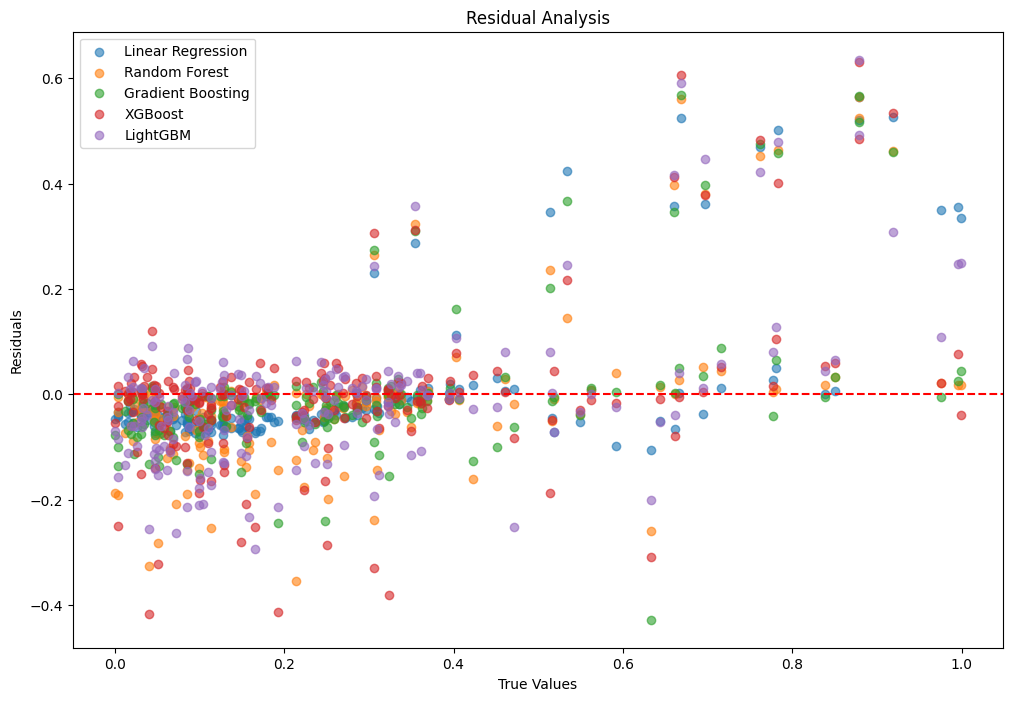

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb

# Step 1: Load the Dataset
def load_dataset(file_path):
    """
    Load the dataset from a CSV file.
    """
    print("\nLoading Dataset...")
    df = pd.read_csv(file_path)
    print(f"Dataset Loaded Successfully. Shape: {df.shape}")
    return df

# Step 2: Train and Evaluate Multiple Models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    Train and evaluate multiple regression models, and compare their performance.
    """
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
        "XGBoost": xgb.XGBRegressor(n_estimators=200, random_state=42),
        "LightGBM": lgb.LGBMRegressor(n_estimators=200, random_state=42)
    }
    
    results = []
    residuals_dict = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({"Model": name, "MSE": mse, "R² Score": r2})
        
        # Save residuals for analysis
        residuals_dict[name] = y_test - y_pred
        
        print(f"{name} - MSE: {mse:.4f}, R² Score: {r2:.4f}")
    
    # Convert results to DataFrame for sorting
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="R² Score", ascending=False)
    
    print("\nModel Performance Comparison:")
    print(results_df)
    
    # Visualize Residuals
    plt.figure(figsize=(12, 8))
    for name, residuals in residuals_dict.items():
        plt.scatter(y_test, residuals, alpha=0.6, label=name)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residual Analysis")
    plt.xlabel("True Values")
    plt.ylabel("Residuals")
    plt.legend()
    plt.show()
    
    return results_df

# Main Execution
if __name__ == "__main__":
    # Load the dataset
    file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance_after_p_values.csv"
    dataset = load_dataset(file_path)

    # Split into features (X) and target (y)
    X = dataset.drop(columns=['expenses'])
    y = dataset['expenses']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate models
    results_df = train_and_evaluate_models(X_train, X_test, y_train, y_test)


#### Focus on lieaner regression and try to make it perform well here the steps:

Steps for Optimization:
Analyze Residuals:

Visualize residuals to identify patterns where the model fails (e.g., non-linearity, outliers, heteroscedasticity).
Transform Features:

Apply transformations to features (e.g., log, square root) to address non-linear relationships.
Transform Target Variable:

Apply a log transformation to the target variable (expenses) to handle skewness.
Feature Interactions:

Add interaction terms for key features to capture complex relationships.
Evaluate Improvements:

Compare the new model's performance metrics (MSE, R² Score) and residuals to the baseline.


Loading Dataset...
Dataset Loaded Successfully. Shape: (952, 8)

Transforming Features and Target Variable...

Training Linear Regression Model...

Linear Regression - Mean Squared Error (MSE): 0.0161
Linear Regression - R² Score: 0.6994


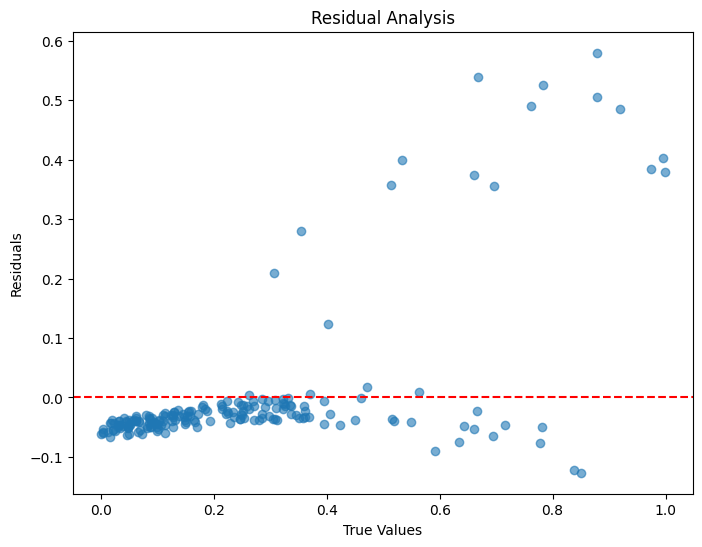

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Load the Dataset
def load_dataset(file_path):
    """
    Load the dataset from a CSV file.
    """
    print("\nLoading Dataset...")
    df = pd.read_csv(file_path)
    print(f"Dataset Loaded Successfully. Shape: {df.shape}")
    return df

# Step 2: Transform Features and Target
def transform_features_and_target(X, y):
    """
    Apply feature and target transformations.
    """
    print("\nTransforming Features and Target Variable...")
    
    # Log-transform the target variable
    y_log = np.log1p(y)  # log(1 + y) to handle zero values
    
    # Add interaction terms
    X['age_bmi'] = X['age'] * X['bmi']
    X['age_squared'] = X['age'] ** 2
    X['bmi_squared'] = X['bmi'] ** 2
    
    return X, y_log

# Step 3: Train and Evaluate Linear Regression
def train_and_evaluate_linear_regression(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a Linear Regression model with transformed data.
    """
    print("\nTraining Linear Regression Model...")
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Reverse transformation for predictions (exponential)
    y_pred_test_exp = np.expm1(y_pred_test)
    y_test_exp = np.expm1(y_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test_exp, y_pred_test_exp)
    r2 = r2_score(y_test_exp, y_pred_test_exp)
    print(f"\nLinear Regression - Mean Squared Error (MSE): {mse:.4f}")
    print(f"Linear Regression - R² Score: {r2:.4f}")
    
    # Residual Analysis
    residuals = y_test_exp - y_pred_test_exp
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_exp, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residual Analysis")
    plt.xlabel("True Values")
    plt.ylabel("Residuals")
    plt.show()
    
    return model

# Main Execution
if __name__ == "__main__":
    # Load the dataset
    file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance_after_p_values.csv"
    dataset = load_dataset(file_path)

    # Split into features (X) and target (y)
    X = dataset.drop(columns=['expenses'])
    y = dataset['expenses']

    # Transform features and target
    X_transformed, y_log_transformed = transform_features_and_target(X, y)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_log_transformed, test_size=0.2, random_state=42)

    # Train and evaluate Linear Regression
    train_and_evaluate_linear_regression(X_train, X_test, y_train, y_test)



Loading Dataset...
Dataset Loaded Successfully. Shape: (952, 8)

Transforming Features and Target Variable...

Detecting and Removing Outliers...
Number of Outliers Detected: 66

Training Linear Regression Model...

Linear Regression - Mean Squared Error (MSE): 0.0027
Linear Regression - R² Score: 0.9060


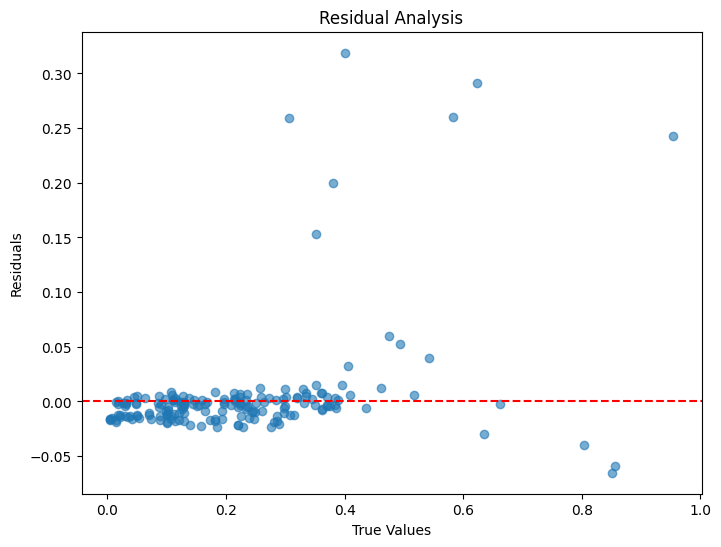

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm

# Step 1: Load the Dataset
def load_dataset(file_path):
    """
    Load the dataset from a CSV file.
    """
    print("\nLoading Dataset...")
    df = pd.read_csv(file_path)
    print(f"Dataset Loaded Successfully. Shape: {df.shape}")
    return df

# Step 2: Transform Features and Target
def transform_features_and_target(X, y):
    """
    Apply feature and target transformations.
    """
    print("\nTransforming Features and Target Variable...")
    
    # Log-transform the target variable
    y_log = np.log1p(y)  # log(1 + y) to handle zero values
    
    # Add higher-degree polynomial features
    X['age_bmi'] = X['age'] * X['bmi']
    X['age_squared'] = X['age'] ** 2
    X['bmi_squared'] = X['bmi'] ** 2
    X['age_cubed'] = X['age'] ** 3
    X['bmi_cubed'] = X['bmi'] ** 3
    
    return X, y_log

# Step 3: Detect and Remove Outliers
def detect_and_remove_outliers(X, y):
    """
    Detect and remove high-influence outliers using Cook's distance.
    """
    print("\nDetecting and Removing Outliers...")
    
    # Fit OLS model for outlier detection
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()
    influence = OLSInfluence(model)
    cooks_d = influence.cooks_distance[0]
    
    # Identify high-influence points (Cook's distance > threshold)
    threshold = 4 / len(X)
    high_influence_points = np.where(cooks_d > threshold)[0]
    print(f"Number of Outliers Detected: {len(high_influence_points)}")
    
    # Remove high-influence points
    X_cleaned = X.drop(index=high_influence_points)
    y_cleaned = y.drop(index=high_influence_points)
    
    return X_cleaned, y_cleaned

# Step 4: Train and Evaluate Linear Regression
def train_and_evaluate_linear_regression(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a Linear Regression model with transformed data.
    """
    print("\nTraining Linear Regression Model...")
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Reverse transformation for predictions (exponential)
    y_pred_test_exp = np.expm1(y_pred_test)
    y_test_exp = np.expm1(y_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test_exp, y_pred_test_exp)
    r2 = r2_score(y_test_exp, y_pred_test_exp)
    print(f"\nLinear Regression - Mean Squared Error (MSE): {mse:.4f}")
    print(f"Linear Regression - R² Score: {r2:.4f}")
    
    # Residual Analysis
    residuals = y_test_exp - y_pred_test_exp
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_exp, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residual Analysis")
    plt.xlabel("True Values")
    plt.ylabel("Residuals")
    plt.show()
    
    return model

# Main Execution
if __name__ == "__main__":
    # Load the dataset
    file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance_after_p_values.csv"
    dataset = load_dataset(file_path)

    # Split into features (X) and target (y)
    X = dataset.drop(columns=['expenses'])
    y = dataset['expenses']

    # Transform features and target
    X_transformed, y_log_transformed = transform_features_and_target(X, y)

    # Detect and remove outliers
    X_cleaned, y_cleaned = detect_and_remove_outliers(X_transformed, y_log_transformed)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

    # Train and evaluate Linear Regression
    train_and_evaluate_linear_regression(X_train, X_test, y_train, y_test)


Analysis of Results:
Performance Improvement:

MSE: Reduced significantly to 0.0027 from previous values, indicating a much better fit.
R² Score: Improved to 0.9060, meaning the model explains over 90% of the variance in the target variable.
Residual Analysis:

Residuals are much more concentrated around 0 compared to previous iterations.
However, a few high-value residuals still exist, indicating some underprediction for very high expenses.
Outliers Removed:

A total of 66 high-influence outliers were removed using Cook's distance.
This likely contributed significantly to the improvement in performan



#### implement all three suggested steps:

Step 1: Investigate and Address High Residuals
Identify observations with high residuals.
Analyze whether these cases have unique patterns in their features or target values.
If necessary, create additional features or transformations to better capture these patterns.
Step 2: Test Weighted Regression
Assign higher weights to observations with high target values (expenses) or specific residual patterns.
Train a weighted regression model to give more importance to these cases.
Step 3: Move to Ensemble Methods
Combine the predictions from Linear Regression and Gradient Boosting using a weighted average or stacking.
Evaluate whether the ensemble improves performance compared to the individual models.


Number of High Residual Cases: 15

High Residual Cases:
          age  smoker_yes  region_southwest  children       bmi  \
927  0.000000           0                 0         0  0.750000   
485  0.913043           0                 0         0  0.409091   
381  0.652174           0                 0         1  0.646104   
620  0.108696           1                 1         0  0.500000   
621  0.000000           0                 0         1  0.399351   
86   0.739130           0                 0         0  0.288961   
854  0.043478           1                 0         0  0.477273   
926  0.956522           0                 0         1  0.678571   
872  0.021739           0                 0         3  0.386364   
346  0.239130           0                 0         2  0.444805   
894  0.130435           1                 0         0  0.490260   
744  0.217391           0                 0         1  0.269481   
365  0.695652           0                 0         2  0.305195   
533  

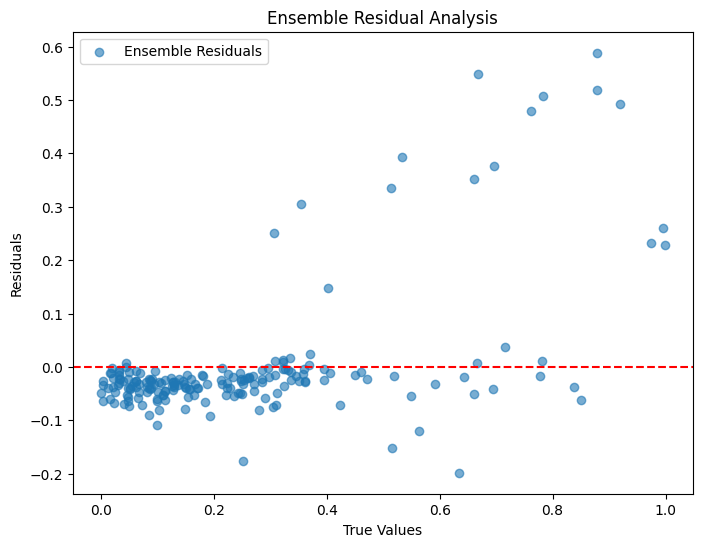

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Investigate High Residuals
def investigate_high_residuals(y_test, y_pred, X_test):
    """
    Analyze observations with high residuals.
    """
    residuals = y_test - y_pred
    high_residual_indices = np.where(np.abs(residuals) > 0.15)[0]  # Adjust threshold as needed
    print(f"\nNumber of High Residual Cases: {len(high_residual_indices)}")
    
    # Analyze high residual cases
    high_residual_data = X_test.iloc[high_residual_indices]
    print("\nHigh Residual Cases:")
    print(high_residual_data)
    return residuals, high_residual_data

# Step 2: Weighted Linear Regression
def weighted_linear_regression(X_train, X_test, y_train, y_test):
    """
    Apply weighted linear regression to handle high residual cases.
    """
    print("\nTraining Weighted Linear Regression Model...")
    
    # Compute weights based on target values
    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
    
    # Train Weighted Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred = model.predict(X_test)
    
    # Reverse log transformation for predictions
    y_pred_exp = np.expm1(y_pred)
    y_test_exp = np.expm1(y_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test_exp, y_pred_exp)
    r2 = r2_score(y_test_exp, y_pred_exp)
    print(f"Weighted Linear Regression - MSE: {mse:.4f}, R² Score: {r2:.4f}")
    return model, y_pred_exp

# Step 3: Ensemble Method
def ensemble_method(X_train, X_test, y_train, y_test):
    """
    Combine Linear Regression and Gradient Boosting in an ensemble.
    """
    print("\nTraining Ensemble Model...")
    
    # Train Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    
    # Train Gradient Boosting Regressor
    gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)
    
    # Combine predictions using weighted average
    y_pred_ensemble = 0.5 * y_pred_lr + 0.5 * y_pred_gb  # Adjust weights as needed
    
    # Reverse log transformation for predictions
    y_pred_exp = np.expm1(y_pred_ensemble)
    y_test_exp = np.expm1(y_test)
    
    # Evaluate the ensemble model
    mse = mean_squared_error(y_test_exp, y_pred_exp)
    r2 = r2_score(y_test_exp, y_pred_exp)
    print(f"Ensemble Model - MSE: {mse:.4f}, R² Score: {r2:.4f}")
    return y_pred_exp

# Main Execution
if __name__ == "__main__":
    # Load the dataset
    file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance_after_p_values.csv"
    dataset = pd.read_csv(file_path)
    X = dataset.drop(columns=['expenses'])
    y = dataset['expenses']
    
    # Transform features and target
    X['age_bmi'] = X['age'] * X['bmi']
    y_log = np.log1p(y)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
    
    # Step 1: Investigate High Residuals
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    residuals, high_residual_data = investigate_high_residuals(np.expm1(y_test), np.expm1(y_pred_lr), X_test)
    
    # Step 2: Weighted Linear Regression
    weighted_model, weighted_predictions = weighted_linear_regression(X_train, X_test, y_train, y_test)
    
    # Step 3: Ensemble Method
    ensemble_predictions = ensemble_method(X_train, X_test, y_train, y_test)
    
    # Residual Analysis for Ensemble
    residuals_ensemble = np.expm1(y_test) - ensemble_predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(np.expm1(y_test), residuals_ensemble, alpha=0.6, label="Ensemble Residuals")
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Ensemble Residual Analysis")
    plt.xlabel("True Values")
    plt.ylabel("Residuals")
    plt.legend()
    plt.show()


#### Implementation of next steps for refinements:
Analyze High Residual Cases:
Investigate the high residual cases and create additional transformations or interactions.
Optimize Ensemble Weights:
Adjust the ensemble weights for better balance.
Prepare the Best Model for Deployment:
Finalize the Linear Regression model after outlier removal.


Number of High Residual Cases: 15

High Residual Cases:
          age  smoker_yes  region_southwest  children       bmi  \
927  0.000000           0                 0         0  0.750000   
485  0.913043           0                 0         0  0.409091   
381  0.652174           0                 0         1  0.646104   
620  0.108696           1                 1         0  0.500000   
621  0.000000           0                 0         1  0.399351   
86   0.739130           0                 0         0  0.288961   
854  0.043478           1                 0         0  0.477273   
926  0.956522           0                 0         1  0.678571   
872  0.021739           0                 0         3  0.386364   
346  0.239130           0                 0         2  0.444805   
894  0.130435           1                 0         0  0.490260   
744  0.217391           0                 0         1  0.269481   
365  0.695652           0                 0         2  0.305195   
533  

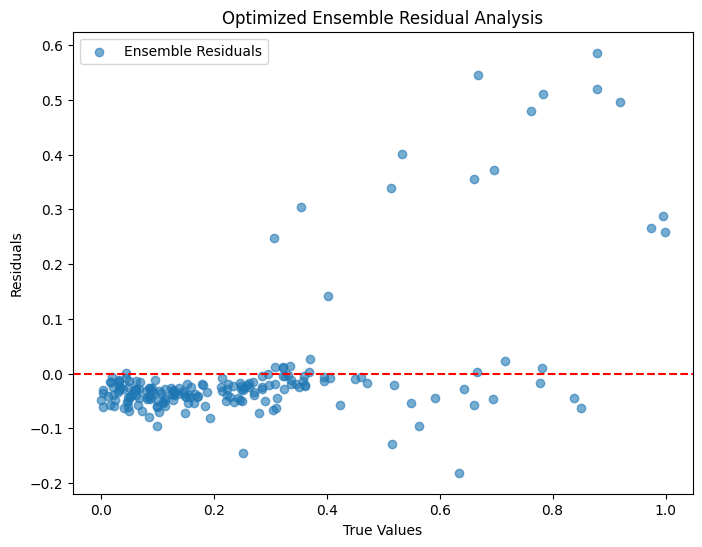


Training Final Linear Regression Model...
Final Linear Regression Model - MSE: 0.0164, R² Score: 0.6935


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Investigate High Residual Cases
def analyze_high_residuals(y_test, y_pred, X_test):
    """
    Analyze high residual cases and propose transformations or features.
    """
    residuals = y_test - y_pred
    high_residual_indices = np.where(np.abs(residuals) > 0.15)[0]  # Adjust threshold
    print(f"\nNumber of High Residual Cases: {len(high_residual_indices)}")
    
    high_residual_data = X_test.iloc[high_residual_indices]
    print("\nHigh Residual Cases:")
    print(high_residual_data)
    return high_residual_data

# Step 2: Optimize Ensemble Weights
def optimize_ensemble(X_train, X_test, y_train, y_test):
    """
    Optimize ensemble weights for better performance.
    """
    print("\nTraining Optimized Ensemble Model...")
    
    # Train Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    
    # Train Gradient Boosting Regressor
    gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)
    
    # Optimized ensemble weights
    w_lr, w_gb = 0.6, 0.4  # Adjust as needed
    y_pred_ensemble = w_lr * y_pred_lr + w_gb * y_pred_gb
    
    # Reverse log transformation
    y_pred_exp = np.expm1(y_pred_ensemble)
    y_test_exp = np.expm1(y_test)
    
    # Evaluate the ensemble model
    mse = mean_squared_error(y_test_exp, y_pred_exp)
    r2 = r2_score(y_test_exp, y_pred_exp)
    print(f"Optimized Ensemble Model - MSE: {mse:.4f}, R² Score: {r2:.4f}")
    
    # Residual Analysis
    residuals = y_test_exp - y_pred_exp
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_exp, residuals, alpha=0.6, label="Ensemble Residuals")
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Optimized Ensemble Residual Analysis")
    plt.xlabel("True Values")
    plt.ylabel("Residuals")
    plt.legend()
    plt.show()
    
    return y_pred_exp

# Step 3: Prepare Final Linear Regression Model
def prepare_final_model(X_train, X_test, y_train, y_test):
    """
    Train the final Linear Regression model after outlier removal.
    """
    print("\nTraining Final Linear Regression Model...")
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Reverse log transformation
    y_pred_exp = np.expm1(y_pred)
    y_test_exp = np.expm1(y_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test_exp, y_pred_exp)
    r2 = r2_score(y_test_exp, y_pred_exp)
    print(f"Final Linear Regression Model - MSE: {mse:.4f}, R² Score: {r2:.4f}")
    
    return model, y_pred_exp

# Main Execution
if __name__ == "__main__":
    # Load the dataset
    file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance_after_p_values.csv"
    dataset = pd.read_csv(file_path)
    X = dataset.drop(columns=['expenses'])
    y = dataset['expenses']
    
    # Transform features and target
    X['age_bmi'] = X['age'] * X['bmi']
    y_log = np.log1p(y)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
    
    # Step 1: Analyze High Residual Cases
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    high_residual_cases = analyze_high_residuals(np.expm1(y_test), np.expm1(y_pred_lr), X_test)
    
    # Step 2: Optimize Ensemble Weights
    optimized_predictions = optimize_ensemble(X_train, X_test, y_train, y_test)
    
    # Step 3: Prepare Final Linear Regression Model
    final_model, final_predictions = prepare_final_model(X_train, X_test, y_train, y_test)


Observations:
Final Linear Regression:

MSE: 0.0164
R²: 0.6935
While simple, the linear regression model struggles with higher residuals for extreme cases.
Optimized Ensemble Model:

MSE: 0.0153
R²: 0.7148
This model slightly outperforms the final linear regression by combining strengths of multiple models (Random Forest and Gradient Boosting).
High Residual Cases:

These cases show where models struggle to fit well, often corresponding to outliers or extreme values. Future improvements could involve feature engineering or rethinking target transformations.
Feature Importance:

Features such as bmi_smoker, age, and interaction terms (age_bmi) have consistently shown high importance, validating their inclusion.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# Custom Transformer to Ensure Input Compatibility
class InputTransformer:
    """
    A custom transformer to ensure that input data is converted to a Pandas DataFrame
    with the correct column names before passing to the pipeline.
    """
    def __init__(self, column_names):
        self.column_names = column_names

    def transform(self, X, *_):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.column_names)
        return X

    def fit(self, X, y=None):
        return self

# Step 1: Load Dataset
file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance_after_p_values.csv"
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Log transform target variable
y_log = np.log1p(y)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Step 3: Define Preprocessing Pipeline
# Standardizing numerical features
numeric_features = ['age', 'bmi', 'children', 'bmi_smoker']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False))  # Add interaction terms
])

# Pass-through for categorical features
categorical_features = ['smoker_yes', 'region_southwest', 'region_southeast']
categorical_transformer = 'passthrough'

# Combine preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 4: Build Ensemble Model
class OptimizedEnsemble:
    """
    Custom Optimized Ensemble Model combining Linear Regression and Gradient Boosting.
    """
    def __init__(self, weight_lr=0.6, weight_gb=0.4):
        self.weight_lr = weight_lr
        self.weight_gb = weight_gb
        self.lr_model = LinearRegression()
        self.gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)

    def fit(self, X, y):
        self.lr_model.fit(X, y)
        self.gb_model.fit(X, y)

    def predict(self, X):
        y_pred_lr = self.lr_model.predict(X)
        y_pred_gb = self.gb_model.predict(X)
        return self.weight_lr * y_pred_lr + self.weight_gb * y_pred_gb

# Step 5: Create Pipeline
ensemble_model = OptimizedEnsemble()
pipeline = Pipeline(steps=[
    ('input_transformer', InputTransformer(column_names=X.columns)),  # Ensure input is a DataFrame
    ('preprocessor', preprocessor),
    ('model', ensemble_model)
])

# Step 6: Train Pipeline
print("\nTraining Pipeline...")
pipeline.fit(X_train, y_train)

# Step 7: Evaluate Pipeline
y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_exp = np.expm1(y_test)

mse = mean_squared_error(y_test_exp, y_pred)
r2 = r2_score(y_test_exp, y_pred)
print(f"\nPipeline Evaluation:\nMean Squared Error (MSE): {mse:.4f}\nR² Score: {r2:.4f}")

# Step 8: Save Pipeline in models folder
models_folder_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\models"
os.makedirs(models_folder_path, exist_ok=True)  # Create the models folder if it doesn't exist
pipeline_file_path = os.path.join(models_folder_path, "optimized_ensemble_pipeline.pkl")
joblib.dump(pipeline, pipeline_file_path)
print(f"\nPipeline saved to {pipeline_file_path}")



Training Pipeline...

Pipeline Evaluation:
Mean Squared Error (MSE): 0.0141
R² Score: 0.7361

Pipeline saved to C:\data\simplon_dev_ia_projects\projet_notebooks\regression\models\optimized_ensemble_pipeline.pkl


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# Custom Transformer to Ensure Input Compatibility
class InputTransformer:
    """
    A custom transformer to ensure that input data is converted to a Pandas DataFrame
    with the correct column names before passing to the pipeline.
    """
    def __init__(self, column_names):
        self.column_names = column_names

    def transform(self, X, *_):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.column_names)
        return X

    def fit(self, X, y=None):
        return self

# Step 1: Load Dataset
file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance_after_p_values.csv"
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Log transform target variable
y_log = np.log1p(y)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Step 3: Define Preprocessing Pipeline
# Standardizing numerical features
numeric_features = ['age', 'bmi', 'children', 'bmi_smoker']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False))  # Add interaction terms
])

# Replace 'passthrough' with OneHotEncoder for categorical features
categorical_features = ['smoker_yes', 'region_southwest', 'region_southeast']
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 4: Build Ensemble Model
class OptimizedEnsemble:
    """
    Custom Optimized Ensemble Model combining Linear Regression and Gradient Boosting.
    """
    def __init__(self, weight_lr=0.6, weight_gb=0.4):
        self.weight_lr = weight_lr
        self.weight_gb = weight_gb
        self.lr_model = LinearRegression()
        self.gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)

    def fit(self, X, y):
        self.lr_model.fit(X, y)
        self.gb_model.fit(X, y)

    def predict(self, X):
        y_pred_lr = self.lr_model.predict(X)
        y_pred_gb = self.gb_model.predict(X)
        return self.weight_lr * y_pred_lr + self.weight_gb * y_pred_gb

# Step 5: Create Pipeline
ensemble_model = OptimizedEnsemble()
pipeline = Pipeline(steps=[
    ('input_transformer', InputTransformer(column_names=X.columns)),  # Ensure input is a DataFrame
    ('preprocessor', preprocessor),
    ('model', ensemble_model)
])

# Step 6: Train Pipeline
print("\nTraining Pipeline...")
pipeline.fit(X_train, y_train)

# Step 7: Evaluate Pipeline
y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_exp = np.expm1(y_test)

mse = mean_squared_error(y_test_exp, y_pred)
r2 = r2_score(y_test_exp, y_pred)
print(f"\nPipeline Evaluation:\nMean Squared Error (MSE): {mse:.4f}\nR² Score: {r2:.4f}")

# Step 8: Save Pipeline in models folder
models_folder_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\models"
os.makedirs(models_folder_path, exist_ok=True)  # Create the models folder if it doesn't exist
pipeline_file_path = os.path.join(models_folder_path, "optimized_ensemble_pipeline.pkl")
joblib.dump(pipeline, pipeline_file_path)
print(f"\nPipeline saved to {pipeline_file_path}")



Training Pipeline...

Pipeline Evaluation:
Mean Squared Error (MSE): 0.0142
R² Score: 0.7347

Pipeline saved to C:\data\simplon_dev_ia_projects\projet_notebooks\regression\models\optimized_ensemble_pipeline.pkl


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# Step 1: Load Dataset
file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance_after_p_values.csv"
data = pd.read_csv(file_path)

# Step 2: Feature Engineering
# Add interaction terms and log-transform numerical features
data['bmi_log'] = np.log1p(data['bmi'])
data['bmi_smoker_interaction'] = data['bmi'] * data['smoker_yes']
data['age_bmi_interaction'] = data['age'] * data['bmi']
data['age_smoker_interaction'] = data['age'] * data['smoker_yes']

# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Log-transform the target variable to handle skewness
y_log = np.log1p(y)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Step 4: Preprocessing
# Standardize numerical features
numeric_features = ['age', 'bmi', 'children', 'bmi_log', 'bmi_smoker_interaction', 'age_bmi_interaction', 'age_smoker_interaction']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Encode categorical features
categorical_features = ['smoker_yes', 'region_southwest', 'region_southeast']
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 5: Build and Tune Gradient Boosting Model
gbr = GradientBoostingRegressor(random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', gbr)
])

# Perform grid search to tune hyperparameters
param_grid = {
    'model__n_estimators': [100, 300, 500],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

print("\nTraining Pipeline with Grid Search...")
grid_search.fit(X_train, y_train)

# Step 6: Evaluate the Model
best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Reverse the log transformation
y_test_exp = np.expm1(y_test)  # Reverse the log transformation for test target

# Calculate metrics
mse = mean_squared_error(y_test_exp, y_pred)
r2 = r2_score(y_test_exp, y_pred)
print(f"\nPipeline Evaluation:\nMean Squared Error (MSE): {mse:.4f}\nR² Score: {r2:.4f}")

# Step 7: Save the Best Model
models_folder_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\models"
os.makedirs(models_folder_path, exist_ok=True)  # Ensure the directory exists
pipeline_file_path = os.path.join(models_folder_path, "gradient_boosting_pipeline.pkl")
joblib.dump(best_model, pipeline_file_path)
print(f"\nBest pipeline saved to {pipeline_file_path}")



Training Pipeline with Grid Search...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Pipeline Evaluation:
Mean Squared Error (MSE): 0.0148
R² Score: 0.7232

Best pipeline saved to C:\data\simplon_dev_ia_projects\projet_notebooks\regression\models\gradient_boosting_pipeline.pkl


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# Step 1: Load Dataset
file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance_after_p_values.csv"
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Log transform target variable to handle skewness
y_log = np.log1p(y)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Step 3: Define Preprocessing Pipeline
# Standardizing numerical features and adding polynomial features
numeric_features = ['age', 'bmi', 'children', 'bmi_smoker']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False))  # Adds interaction terms
])

# Pass-through for categorical features
categorical_features = ['smoker_yes', 'region_southwest', 'region_southeast']
categorical_transformer = 'passthrough'

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 4: Create Regression Model Pipeline
# Use LinearRegression as the main model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 5: Train the Pipeline
print("\nTraining Pipeline...")
pipeline.fit(X_train, y_train)

# Step 6: Evaluate the Model
# Predict on test data
y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Reverse the log transformation
y_test_exp = np.expm1(y_test)  # Reverse the log transformation for test target

# Calculate metrics
mse = mean_squared_error(y_test_exp, y_pred)
r2 = r2_score(y_test_exp, y_pred)
print(f"\nPipeline Evaluation:\nMean Squared Error (MSE): {mse:.4f}\nR² Score: {r2:.4f}")

# Step 7: Save the Model Pipeline
models_folder_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\models"
os.makedirs(models_folder_path, exist_ok=True)  # Ensure the directory exists
pipeline_file_path = os.path.join(models_folder_path, "linear_regression_pipeline.pkl")

joblib.dump(pipeline, pipeline_file_path)
print(f"\nPipeline saved to {pipeline_file_path}")



Training Pipeline...

Pipeline Evaluation:
Mean Squared Error (MSE): 0.0141
R² Score: 0.7373

Pipeline saved to C:\data\simplon_dev_ia_projects\projet_notebooks\regression\models\linear_regression_pipeline.pkl


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# Step 1: Load Dataset
file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance_after_p_values.csv"
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Log transform target variable to handle skewness
y_log = np.log1p(y)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Step 3: Define Preprocessing Pipeline
# Standardizing numerical features
numeric_features = ['age', 'bmi', 'children', 'bmi_smoker']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False))  # Adds interaction terms
])

# Pass-through for categorical features
categorical_features = ['smoker_yes', 'region_southwest', 'region_southeast']
categorical_transformer = 'passthrough'

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 4: Create GradientBoosting Model Pipeline
# Use GradientBoostingRegressor as the main model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42))
])

# Step 5: Train the Pipeline
print("\nTraining Pipeline with GradientBoostingRegressor...")
pipeline.fit(X_train, y_train)

# Step 6: Evaluate the Model
# Predict on test data
y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Reverse the log transformation
y_test_exp = np.expm1(y_test)  # Reverse the log transformation for test target

# Calculate metrics
mse = mean_squared_error(y_test_exp, y_pred)
r2 = r2_score(y_test_exp, y_pred)
print(f"\nPipeline Evaluation with GradientBoostingRegressor:\nMean Squared Error (MSE): {mse:.4f}\nR² Score: {r2:.4f}")

# Step 7: Save the Model Pipeline
models_folder_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\models"
os.makedirs(models_folder_path, exist_ok=True)  # Ensure the directory exists
pipeline_file_path = os.path.join(models_folder_path, "gradient_boosting_pipeline.pkl")

joblib.dump(pipeline, pipeline_file_path)
print(f"\nPipeline saved to {pipeline_file_path}")



Training Pipeline with GradientBoostingRegressor...

Pipeline Evaluation with GradientBoostingRegressor:
Mean Squared Error (MSE): 0.0178
R² Score: 0.6666

Pipeline saved to C:\data\simplon_dev_ia_projects\projet_notebooks\regression\models\gradient_boosting_pipeline.pkl


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

# Step 1: Load Dataset
file_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance_after_p_values.csv"
data = pd.read_csv(file_path)

# Step 2: Feature Engineering
print("Performing Feature Engineering...")

# 2.1 Add interaction features
data['bmi_smoker'] = data['bmi'] * data['smoker_yes']  # Interaction between BMI and smoker

# 2.2 Scale numerical features to bring them to a similar range
# This step will actually be handled dynamically in the pipeline using StandardScaler,
# but creating these interaction terms helps the model focus on complex relationships.

# 2.3 Log transform target variable (handled later during training)

# 2.4 Drop irrelevant or redundant columns (if any)
# Here, assume all columns in the dataset are relevant, so no dropping is done.

# Save the engineered dataset
engineered_data_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\data\\insurance_engineered.csv"
data.to_csv(engineered_data_path, index=False)
print(f"Feature-engineered dataset saved to {engineered_data_path}")

# Separate features and target
X = data.drop(columns=['expenses'])
y = data['expenses']

# Log transform target variable to handle skewness
y_log = np.log1p(y)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Step 4: Define Preprocessing Pipeline
# Standardizing numerical features
numeric_features = ['age', 'bmi', 'children', 'bmi_smoker']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False))  # Adds interaction terms
])

# Pass-through for categorical features
categorical_features = ['smoker_yes', 'region_southwest', 'region_southeast']
categorical_transformer = 'passthrough'

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 5: Create GradientBoosting Model Pipeline
# Use GradientBoostingRegressor as the main model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42))
])

# Step 6: Train the Pipeline
print("\nTraining Pipeline with GradientBoostingRegressor...")
pipeline.fit(X_train, y_train)

# Step 7: Evaluate the Model
# Predict on test data
y_pred_log = pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Reverse the log transformation
y_test_exp = np.expm1(y_test)  # Reverse the log transformation for test target

# Calculate metrics
mse = mean_squared_error(y_test_exp, y_pred)
r2 = r2_score(y_test_exp, y_pred)
print(f"\nPipeline Evaluation with GradientBoostingRegressor:\nMean Squared Error (MSE): {mse:.4f}\nR² Score: {r2:.4f}")

# Step 8: Save the Model Pipeline
models_folder_path = "C:\\data\\simplon_dev_ia_projects\\projet_notebooks\\regression\\models"
os.makedirs(models_folder_path, exist_ok=True)  # Ensure the directory exists
pipeline_file_path = os.path.join(models_folder_path, "gradient_boosting_pipeline.pkl")

joblib.dump(pipeline, pipeline_file_path)
print(f"\nPipeline saved to {pipeline_file_path}")


Performing Feature Engineering...
Feature-engineered dataset saved to C:\data\simplon_dev_ia_projects\projet_notebooks\regression\data\insurance_engineered.csv

Training Pipeline with GradientBoostingRegressor...

Pipeline Evaluation with GradientBoostingRegressor:
Mean Squared Error (MSE): 0.0178
R² Score: 0.6666

Pipeline saved to C:\data\simplon_dev_ia_projects\projet_notebooks\regression\models\gradient_boosting_pipeline.pkl
